In [ ]:
# Data Set - https://drive.google.com/file/d/1QgW1lpwvLR8VvjfPuhlamNvNEmz7qIsS/view?usp=drive_link
# Data Repo - https://drive.google.com/drive/folders/10SUoVOHnv95fLr-w2HSktjQUd96jXA3U?usp=sharing

In [ ]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# scikit-learn libraries
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, roc_auc_score, roc_curve

# ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

# formatting the notebook
pd.set_option('display.max_columns', None)

In [ ]:
# import data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Sets/breast_cancer_csv.csv')
data.shape

In [ ]:
# data sample
data.head()

In [ ]:
ax = sns.countplot(x= data['diagnosis'],color ='pink')
ax.bar_label(ax.containers[0])
plt.show()

round(data['diagnosis'].value_counts(normalize = True)*100,2)

In [ ]:
# Based on the observation

# droping the id and unnamed column

data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
# convert the target to binary class

data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})

data.head()

In [ ]:
# missing value, datatype, sample check
missing_df = pd.DataFrame(data.isnull().sum(),columns=['Missing_values'])
datatype_df= pd.DataFrame(data.dtypes , columns=['Data_types'])
sample_df= data.head(5).T
sample_df = sample_df.rename(columns={0 : 'sample_1', 1: 'sample_2'})
evaluate_df=pd.concat([missing_df, datatype_df,sample_df], axis=1)
evaluate_df

In [ ]:
# data variable split

x = data.drop(['diagnosis'],axis =1)
y = data['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

print('training data dimensions')
print(x_train.shape)
print(y_train.shape)

print('testing data dimensions')
print(x_test.shape)
print(y_test.shape)

In [ ]:
# HyperPaarameter Tunning

params = {'criterion':['gini', 'entropy'],
          'bootstrap': [True, False],
          'max_features': ['sqrt', 'log2', None, 'auto']}

In [ ]:
# suing GridSearchCV

start_time = time.time()
rf = RandomForestClassifier(random_state=42)
hyper_fit = GridSearchCV(estimator= rf,
                         param_grid = params,
                         n_jobs = -1)

# fit the model with the data
hyper_fit.fit(x_train,y_train)

print('Best Parameter from grid search:', hyper_fit.best_params_)

end_time = time.time()

print('Time taken for grid search:', round(end_time-start_time, 2))

In [ ]:
#print('Best Parameter from grid search:', hyper_fit.best_params_)

#end_time = time.time()                                                       # this also same code of lines bbubt we are investing more time for excicute so we use this line of code in the above line its self

#print('Time taken for grid search:', round(end_time-start_time, 2))             # Time taken for grid search we get is'63.00'


In [ ]:
# setting the best parameter to the model

best_params = hyper_fit.best_params_
final_model = RandomForestClassifier(**best_params,random_state=42)

In [14]:
# OOB - Out of bag
# final_model.set_params(warm_start=False, oob_score=True, n_jobs=-1)

# # Trees
# min_estimator = 15
# max_estimator = 700

# # error dict
# error_rate = {}

# # iterating the rf for the oob values wrt to trees
# for trees in range(min_estimator, max_estimator+1):
#     final_model.set_params(n_estimators=trees)
#     final_model.fit(x_train, y_train)
#     oob_error = 1-final_model.oob_score_
#     error_rate[trees] = oob_error

In [15]:
# converting the dictionary to series
# oob_data = pd.Series(error_rate)
# oob_data.head()

,0
15,0.052764
16,0.047739
17,0.045226
18,0.050251
19,0.052764


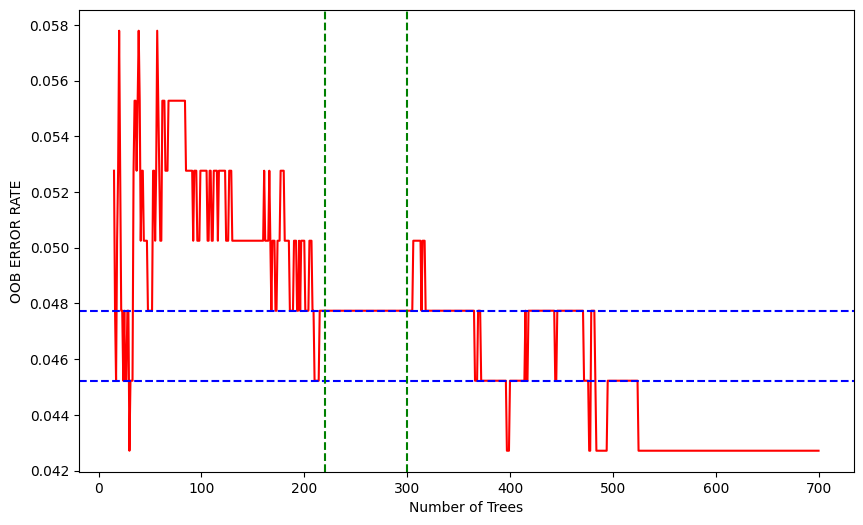

In [16]:
# plotting the oob against the trees

plt.figure(figsize=(10,6))
oob_data.plot(kind = 'line',color = 'red')
plt.xlabel('Number of Trees')
plt.ylabel('OOB ERROR RATE')
plt.axhline(0.047739, color = 'blue', ls = '--')
plt.axhline(0.045226, color='blue', ls='--')
plt.axvline(220,color = 'green', ls ='--')
plt.axvline(300,color = 'green', ls ='--')
plt.show()

In [17]:
print(oob_data.loc[220:300])

220    0.047739
221    0.047739
222    0.047739
223    0.047739
224    0.047739
         ...   
296    0.047739
297    0.047739
298    0.047739
299    0.047739
300    0.047739
Length: 81, dtype: float64


<bound method BaseEstimator.get_params of RandomForestClassifier(criterion='entropy', n_estimators=261, n_jobs=-1,
                       random_state=42)>

Training Score: 100.0 %
Testing Score: 97.08 %
Classification Report:

               precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



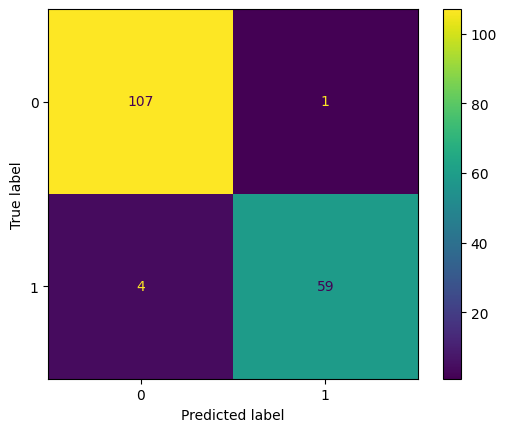

In [18]:
# refining the trees via OOB
final_model.set_params(n_estimators = 261,warm_start = False , oob_score = False,random_state= 42 )

# final model parameters
print(final_model.get_params)

# model Training
final_model.fit(x_train,y_train)

# training score
print('\nTraining Score:', round(final_model.score(x_train, y_train)*100, 2), '%')

#prediction
y_pred = final_model.predict(x_test)

#metrics
print('Testing Score:', round(accuracy_score(y_test, y_pred)*100, 2), '%')
cm = ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print('Classification Report:\n\n',classification_report(y_test,y_pred))


**Variable** **Importancce**

In [19]:
# variable importance array of variables
importance = final_model.feature_importances_
importance= np.sort(importance)[::-1]
importance

array([0.12621271, 0.12227814, 0.12218307, 0.11050976, 0.06855374,
       0.06011028, 0.0409879 , 0.04057869, 0.03868013, 0.03548984,
       0.02961475, 0.02505396, 0.01987122, 0.01757219, 0.01746074,
       0.01607256, 0.01397808, 0.01343152, 0.00975853, 0.0077204 ,
       0.00765255, 0.00737566, 0.00690488, 0.00685867, 0.00670104,
       0.00666392, 0.00601131, 0.00551141, 0.00546386, 0.00473847])

In [20]:
# index of the above array arranged in descending order of the importances
indx= np.argsort(importance)[::-1]
indx

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [21]:
# list of independent variables
name_indx = list(data.columns[1:])
name_indx

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [22]:
# dataframe for importance
impurity_df = pd.DataFrame({'mean_impurity':importance,'column_index':indx})
impurity_df.index = range(1,len(impurity_df)+1)   # starting the index from 1
impurity_df['column_name'] = impurity_df['column_index'].apply(lambda x: name_indx[x])
impurity_df = impurity_df[['column_name','mean_impurity']]
impurity_df['percentage_impurity'] = round(impurity_df['mean_impurity']*100,3)
impurity_df['cum_impurity'] = impurity_df['percentage_impurity'].cumsum()
impurity_df

,column_name,mean_impurity,percentage_impurity,cum_impurity
1,radius_mean,0.126213,12.621,12.621
2,texture_mean,0.122278,12.228,24.849
3,perimeter_mean,0.122183,12.218,37.067
4,area_mean,0.110510,11.051,48.118
5,smoothness_mean,0.068554,6.855,54.973
6,compactness_mean,0.060110,6.011,60.984
7,concavity_mean,0.040988,4.099,65.083
8,concave points_mean,0.040579,4.058,69.141
9,symmetry_mean,0.038680,3.868,73.009
10,fractal_dimension_mean,0.035490,3.549,76.558


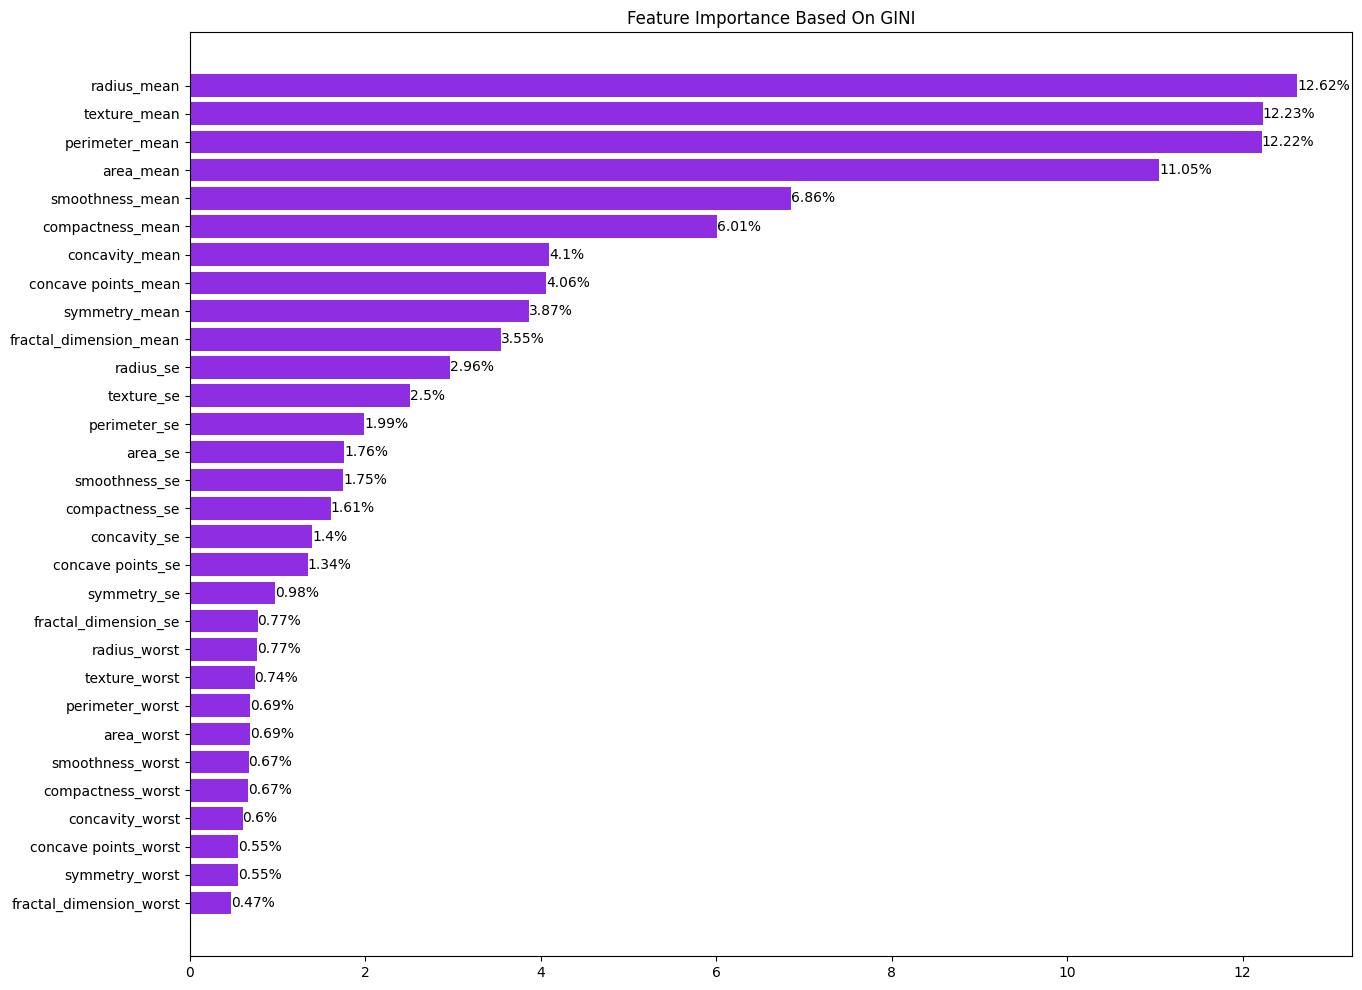

In [23]:
# Feature importance graph
fig, ax = plt.subplots(figsize=(15,12))
plt.title('Feature Importance Based On GINI')
plt.barh('column_name', 'percentage_impurity', data=impurity_df, align='center', color='#8e2de2')
for i, val in enumerate(impurity_df['percentage_impurity']):
    plt.text(val, i, f'{round(val,2)}%', va='center', fontsize=10)
plt.gca().invert_yaxis()
plt.show()

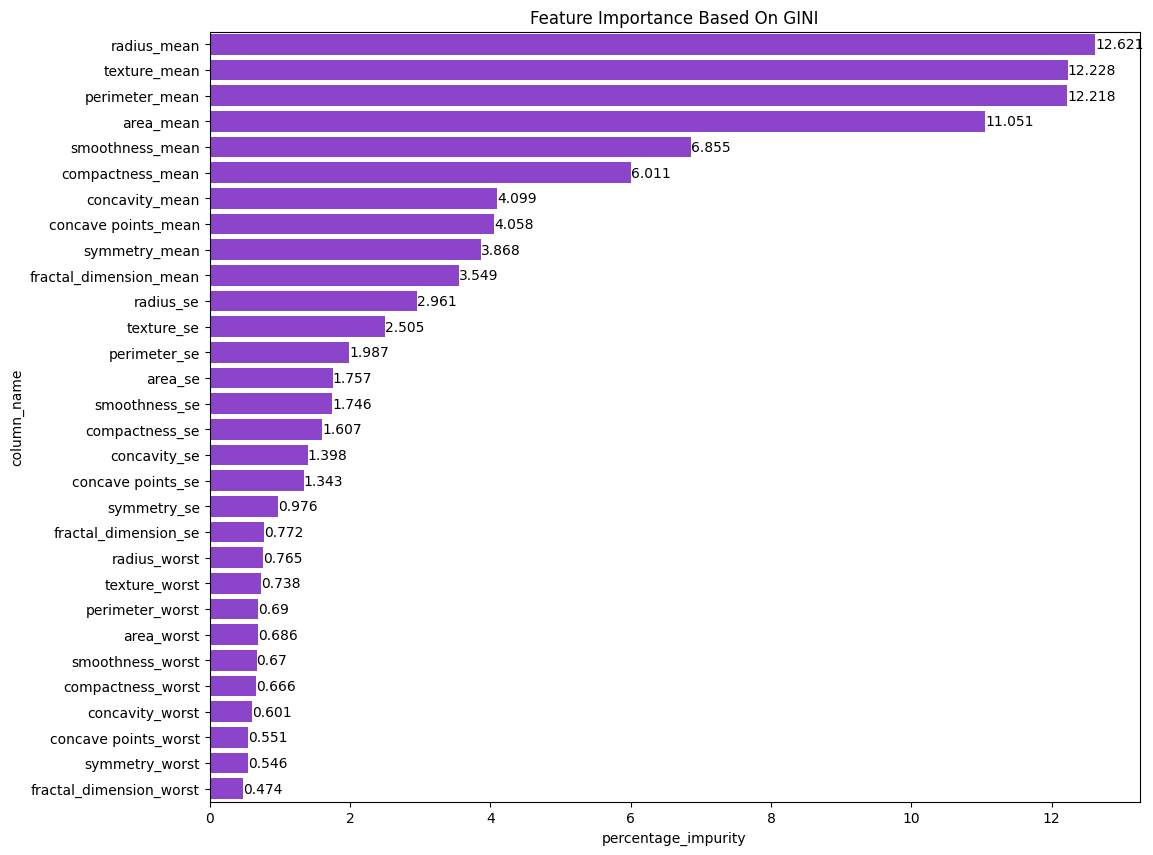

In [24]:
plt.figure(figsize=(12,10))
ax=sns.barplot(impurity_df,x='percentage_impurity',y='column_name',color='#8e2de2')
ax.bar_label(ax.containers[0])
plt.title('Feature Importance Based On GINI')
plt.show()

In [25]:
    # filtereing the columns with total of 90% mean impurity
    # filtering the x_train, x_test data for the above columns
    # build the model for the same and check the metrics

In [26]:
# filetring colums with 90% mean impurity
final_columns = list(impurity_df[impurity_df['cum_impurity'] <=90].column_name)
  # filtering the x_train, x_test data for the above columns
x_train_filttered = x_train[final_columns]
x_test_filttered = x_test[final_columns]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.1s


building tree 1 of 261
building tree 2 of 261building tree 3 of 261

building tree 4 of 261
building tree 5 of 261
building tree 6 of 261
building tree 7 of 261building tree 8 of 261
building tree 9 of 261
building tree 10 of 261

building tree 11 of 261building tree 12 of 261
building tree 13 of 261
building tree 14 of 261

building tree 15 of 261building tree 16 of 261
building tree 17 of 261
building tree 18 of 261
building tree 19 of 261

building tree 20 of 261building tree 21 of 261

building tree 22 of 261building tree 23 of 261
building tree 24 of 261

building tree 25 of 261building tree 26 of 261
building tree 27 of 261
building tree 28 of 261
building tree 29 of 261
building tree 30 of 261

building tree 31 of 261building tree 32 of 261
building tree 33 of 261

building tree 34 of 261building tree 35 of 261
building tree 36 of 261
building tree 37 of 261
building tree 38 of 261
building tree 39 of 261
building tree 40 of 261
building tree 41 of 261
building tree 42 of 261
bu

[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:    0.4s


building tree 142 of 261
building tree 143 of 261
building tree 144 of 261building tree 145 of 261

building tree 146 of 261building tree 147 of 261
building tree 148 of 261
building tree 149 of 261
building tree 150 of 261

building tree 151 of 261
building tree 152 of 261
building tree 153 of 261
building tree 154 of 261building tree 155 of 261

building tree 156 of 261
building tree 157 of 261building tree 158 of 261
building tree 159 of 261

building tree 160 of 261building tree 161 of 261

building tree 162 of 261
building tree 163 of 261building tree 164 of 261
building tree 165 of 261
building tree 166 of 261
building tree 167 of 261

building tree 168 of 261building tree 169 of 261

building tree 170 of 261
building tree 171 of 261
building tree 172 of 261
building tree 173 of 261
building tree 174 of 261
building tree 175 of 261
building tree 176 of 261building tree 177 of 261

building tree 178 of 261building tree 179 of 261
building tree 180 of 261
building tree 181 of 261
b

[Parallel(n_jobs=-1)]: Done 217 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 261 out of 261 | elapsed:    1.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 239 of 261building tree 240 of 261
building tree 241 of 261
building tree 242 of 261

building tree 243 of 261building tree 244 of 261
building tree 245 of 261
building tree 246 of 261
building tree 247 of 261
building tree 248 of 261
building tree 249 of 261
building tree 250 of 261
building tree 251 of 261
building tree 252 of 261

building tree 253 of 261building tree 254 of 261
building tree 255 of 261
building tree 256 of 261
building tree 257 of 261
building tree 258 of 261

building tree 259 of 261building tree 260 of 261

building tree 261 of 261

Training Score: 1.0


[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 217 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 261 out of 261 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 217 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 261 out of 261 | elapsed:    0.1s finished



Classification Report:               precision    recall  f1-score   support

           0       0.96      0.96      0.96       108
           1       0.94      0.94      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



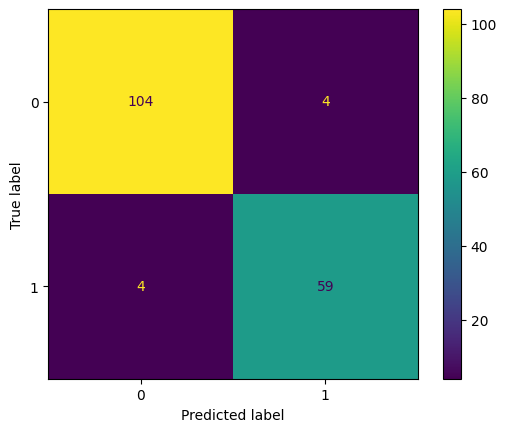

In [30]:
# # optimized model
final_params = final_model.get_params()
opt_model = RandomForestClassifier(**final_params)
opt_model.set_params(verbose = 4)

# training the data
opt_model.fit(x_train_filttered, y_train)

# training score
print('\nTraining Score:', opt_model.score(x_train_filttered, y_train))

# prediction
opt_y_pred = opt_model.predict(x_test_filttered)

# metrics
cm = ConfusionMatrixDisplay.from_predictions(y_test, opt_y_pred)
print('\nClassification Report:', classification_report(y_test, opt_y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 261 out of 261 | elapsed:    1.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 261 out of 261 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s



Training Score: 1.0


[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 261 out of 261 | elapsed:    0.1s finished



Classification Report:               precision    recall  f1-score   support

           0       0.96      0.96      0.96       108
           1       0.94      0.94      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



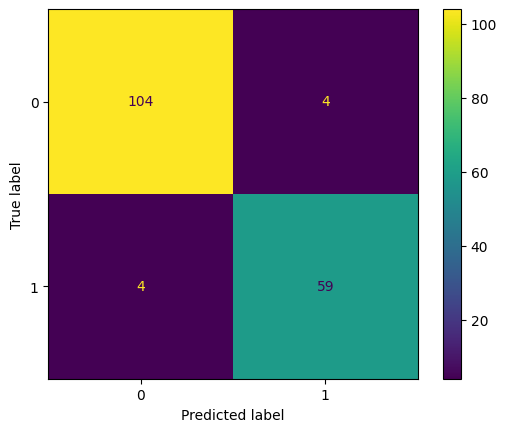

In [28]:
# optimized model
final_params = final_model.get_params()
opt_model = RandomForestClassifier(**final_params)
opt_model.set_params(verbose=1)

# training the data
opt_model.fit(x_train_filttered, y_train)

# training score
print('\nTraining Score:', opt_model.score(x_train_filttered, y_train))

# prediction
opt_y_pred = opt_model.predict(x_test_filttered)

# metrics
cm = ConfusionMatrixDisplay.from_predictions(y_test, opt_y_pred)
print('\nClassification Report:', classification_report(y_test, opt_y_pred))

In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Training
dt = DecisionTreeClassifier(random_state=42, max_depth=4)
dt.fit(x_train_filttered, y_train)
print(round(dt.score(x_train_filttered, y_train)*100,2))

# Testing
dt_pred = dt.predict(x_test_filttered)
print(round(accuracy_score(y_test, dt_pred)*100,2))

# Confusion Matrix and report
cm = ConfusionMatrixDisplay.from_predictions(y_test, dt_pred)
report = classification_report(y_test, dt_pred)
print(report)

In [ ]:
data['diagnosis'].value_counts(normalize=True)*100